In [29]:
import torch
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models
from torchvision.datasets import ImageFolder

import numpy as np
import random
import seaborn as sns
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tqdm import tqdm

import seaborn as sns
from sklearn.metrics import confusion_matrix
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Data preparation

In [4]:
data_dir = "/content/drive/My Drive/AI-engineer/CV/images"

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

dataset = ImageFolder(root=data_dir, transform=transform)

In [5]:
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

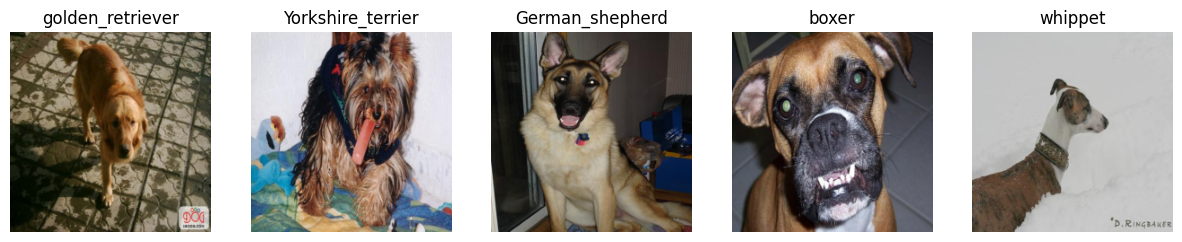

In [6]:
def show_images(loader):
    images, labels = next(iter(loader))
    images = images.numpy().transpose((0, 2, 3, 1))
    fig, axes = plt.subplots(1, 5, figsize=(15, 5))
    for img, label, ax in zip(images, labels, axes):
        ax.imshow(img)
        ax.set_title(dataset.classes[label])
        ax.axis('off')
    plt.show()

show_images(train_loader)

## 2. Data Augmentation

In [7]:
data_augmentation = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=15),  # ±15 градусов
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Random color jitter
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

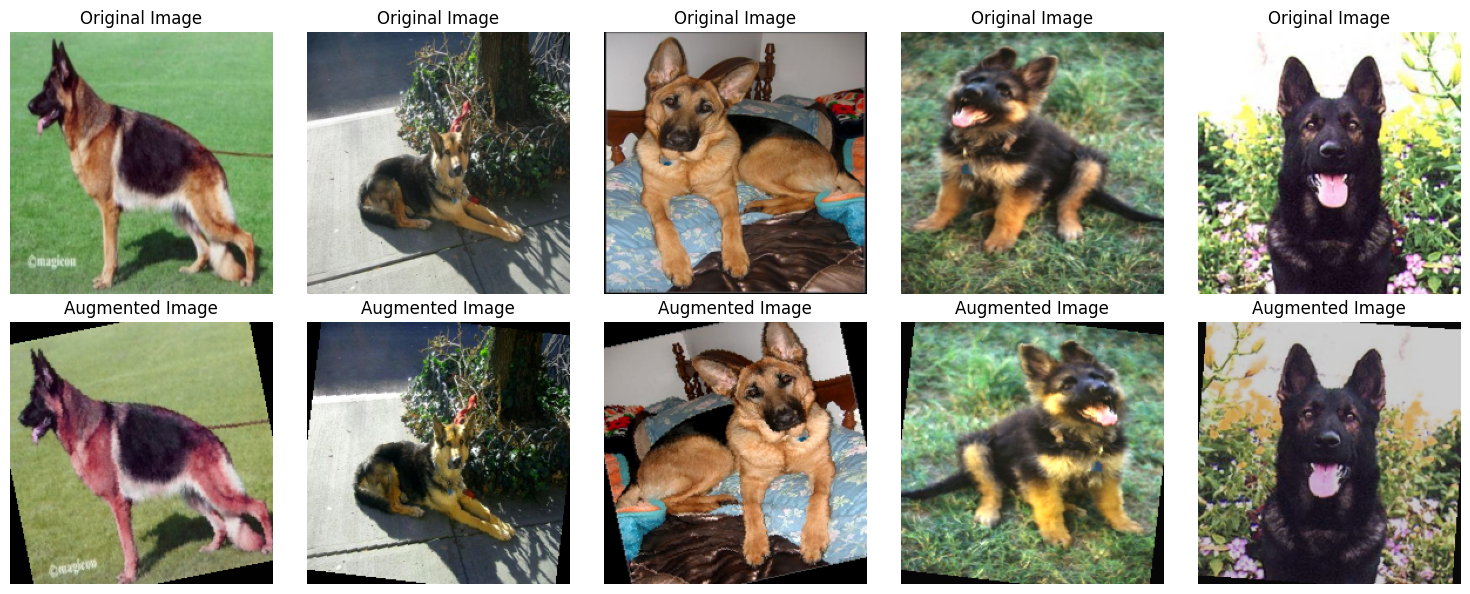

In [8]:
def show_augmented_images(dataset, num_images=5):
    fig, axes = plt.subplots(2, num_images, figsize=(15, 6))

    for i in range(num_images):
        # Get the original image
        original_image, _ = dataset[i]

        # Convert to PIL
        original_image_pil = transforms.ToPILImage()(original_image)

        # Apply augmentation
        augmented_image = data_augmentation(original_image_pil)

        # Convert to np array
        original_image_np = original_image.numpy().transpose((1, 2, 0))
        augmented_image_np = augmented_image.numpy().transpose((1, 2, 0))

        axes[0, i].imshow(original_image_np)
        axes[0, i].axis('off')
        axes[0, i].set_title('Original Image')

        axes[1, i].imshow(augmented_image_np)
        axes[1, i].axis('off')
        axes[1, i].set_title('Augmented Image')

    plt.tight_layout()
    plt.show()

show_augmented_images(dataset)

## 3. Loading the model


In [44]:
model = models.resnet18(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 10)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [52]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## 4. Settings for training

In [40]:
def train_epoch(model, trainloader, criterion, optimizer):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in tqdm(trainloader, desc='Training'):

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    epoch_loss = running_loss / len(trainloader)
    epoch_acc = 100. * correct / total
    return epoch_loss, epoch_acc


def validate(model, testloader, criterion):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in tqdm(testloader, desc='Validation'):
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    epoch_loss = running_loss / len(testloader)
    epoch_acc = 100. * correct / total
    return epoch_loss, epoch_acc


def get_lr_scheduler(optimizer, num_epochs):
    return torch.optim.lr_scheduler.OneCycleLR(
        optimizer,
        max_lr=0.1,
        epochs=num_epochs,
        steps_per_epoch=len(train_loader),
        pct_start=0.3,
        anneal_strategy='cos'
    )

In [25]:
def plot_training_history(train_losses, val_losses, train_accs, val_accs):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Plot losses
    ax1.plot(train_losses, label='Training Loss')
    ax1.plot(val_losses, label='Validation Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.set_title('Training and Validation Loss')

    # Plot accuracies
    ax2.plot(train_accs, label='Training Accuracy')
    ax2.plot(val_accs, label='Validation Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy (%)')
    ax2.legend()
    ax2.set_title('Training and Validation Accuracy')

    plt.tight_layout()
    plt.show()

## 5. Training - 1

In [46]:
for param in model.parameters():
    param.requires_grad = False

for param in model.fc.parameters():
    param.requires_grad = True


Epoch 1/5


Validation: 100%|██████████| 8/8 [00:25<00:00,  3.13s/it]


Training Loss: 0.9142, Training Acc: 73.07%
Validation Loss: 0.2980, Validation Acc: 91.49%

Epoch 2/5


Validation: 100%|██████████| 8/8 [00:25<00:00,  3.14s/it]


Training Loss: 0.2147, Training Acc: 94.45%
Validation Loss: 0.2430, Validation Acc: 91.49%

Epoch 3/5


Validation: 100%|██████████| 8/8 [00:23<00:00,  2.96s/it]


Training Loss: 0.1474, Training Acc: 95.72%
Validation Loss: 0.2369, Validation Acc: 93.19%

Epoch 4/5


Validation: 100%|██████████| 8/8 [00:23<00:00,  2.97s/it]


Training Loss: 0.1217, Training Acc: 96.63%
Validation Loss: 0.2266, Validation Acc: 93.19%

Epoch 5/5


Validation: 100%|██████████| 8/8 [00:25<00:00,  3.14s/it]


Training Loss: 0.1040, Training Acc: 96.82%
Validation Loss: 0.2291, Validation Acc: 91.49%


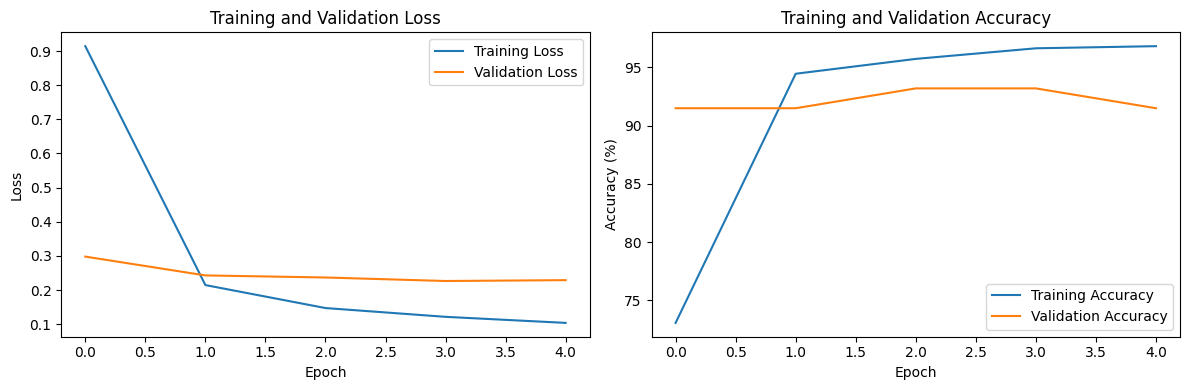

In [47]:
num_epochs = 5
learning_rate = 0.001

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = get_lr_scheduler(optimizer, num_epochs)

# Training history
train_losses = []
val_losses = []
train_accs = []
val_accs = []
best_val_acc = 0

# Training loop
for epoch in range(num_epochs):
    print(f'\nEpoch {epoch+1}/{num_epochs}')

    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer)
    train_losses.append(train_loss)
    train_accs.append(train_acc)

    val_loss, val_acc = validate(model, val_loader, criterion)
    val_losses.append(val_loss)
    val_accs.append(val_acc)

    scheduler.step()

    # Save best model
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), 'best_model.pth')

    print(f'Training Loss: {train_loss:.4f}, Training Acc: {train_acc:.2f}%')
    print(f'Validation Loss: {val_loss:.4f}, Validation Acc: {val_acc:.2f}%')

# Plot training history
plot_training_history(train_losses, val_losses, train_accs, val_accs)

In [62]:
from google.colab import files

files.download('best_model.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 6. Training - 2

In [56]:
# Freeze all layers
for param in model.parameters():
    param.requires_grad = False

# Unfreeze the last two layers: layer4 and fc
for param in model.layer4.parameters():
    param.requires_grad = True

for param in model.fc.parameters():
    param.requires_grad = True

In [57]:
#With gradient clipping
def train_epoch_clip(model, trainloader, criterion, optimizer, clip_value):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in tqdm(trainloader, desc='Training'):

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()

        # Gradient clipping
        nn.utils.clip_grad_norm_(model.parameters(), clip_value)

        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    epoch_loss = running_loss / len(trainloader)
    epoch_acc = 100. * correct / total
    return epoch_loss, epoch_acc

In [59]:
num_epochs = 5
learning_rate = 0.0001
gradient_clip_value = 1.0

optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

# Training history
train_losses = []
val_losses = []
train_accs = []
val_accs = []
best_val_acc = 0

# Training loop
for epoch in range(num_epochs):
    print(f'\nEpoch {epoch+1}/{num_epochs}')

    # Train
    train_loss, train_acc = train_epoch_clip(model, train_loader, criterion, optimizer, gradient_clip_value)
    train_losses.append(train_loss)
    train_accs.append(train_acc)

    # Validate
    val_loss, val_acc = validate(model, val_loader, criterion)
    val_losses.append(val_loss)
    val_accs.append(val_acc)

    # Save best model
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), 'best_model_finetuned.pth')

    # Print epoch statistics
    print(f'Training Loss: {train_loss:.4f}, Training Acc: {train_acc:.2f}%')
    print(f'Validation Loss: {val_loss:.4f}, Validation Acc: {val_acc:.2f}%')


Epoch 1/5


Validation: 100%|██████████| 8/8 [00:30<00:00,  3.83s/it]


Training Loss: 0.0274, Training Acc: 99.27%
Validation Loss: 0.2316, Validation Acc: 93.19%

Epoch 2/5


Validation: 100%|██████████| 8/8 [00:25<00:00,  3.15s/it]


Training Loss: 0.0105, Training Acc: 99.73%
Validation Loss: 0.2192, Validation Acc: 92.34%

Epoch 3/5


Validation: 100%|██████████| 8/8 [00:25<00:00,  3.15s/it]


Training Loss: 0.0031, Training Acc: 100.00%
Validation Loss: 0.2016, Validation Acc: 92.34%

Epoch 4/5


Validation: 100%|██████████| 8/8 [00:25<00:00,  3.17s/it]


Training Loss: 0.0019, Training Acc: 100.00%
Validation Loss: 0.2368, Validation Acc: 93.19%

Epoch 5/5


Validation: 100%|██████████| 8/8 [00:25<00:00,  3.16s/it]

Training Loss: 0.0011, Training Acc: 100.00%
Validation Loss: 0.2717, Validation Acc: 92.34%


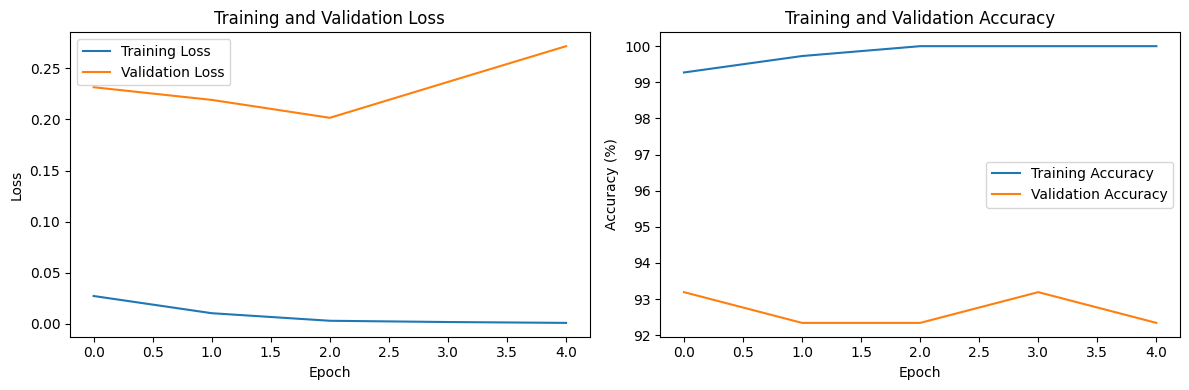

In [60]:
plot_training_history(train_losses, val_losses, train_accs, val_accs)

In [63]:
files.download('best_model_finetuned.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

# Get predictions for confusion matrix
def get_predictions(model, data_loader, device):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = outputs.max(1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    return all_labels, all_preds

# Get true labels and predictions for validation set
y_true, y_pred = get_predictions(model, val_loader, device

# Plot confusion matrix
class_names = [...]  # Replace with your actual class names
plot_confusion_matrix(y_true, y_pred, class_names)

# Identify difficult classifications
def analyze_difficult_classifications(y_true, y_pred, inputs):
    incorrect_samples = []
    for i in range(len(y_true)):
        if y_true[i] != y_pred[i]:
            incorrect_samples.append((inputs[i], y_true[i], y_pred[i]))  # (input_image, true_label, predicted_label)
    return incorrect_samples

# Get difficult classifications
difficult_classifications = analyze_difficult_classifications(y_true, y_pred, val_loader.dataset.data)

# Display the most challenging samples
for sample in difficult_classifications[:5]:  # Display first 5 difficult samples
    input_image, true_label, pred_label = sample
    plt.imshow(input_image.permute(1, 2, 0))  # Adjust based on your input format
    plt.title(f'True: {class_names[true_label]}, Predicted: {class_names[pred_label]}')
    plt.axis('off')
    plt.show()